In [102]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
kf_4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [17]:
data=pd.read_csv("train_titan.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [18]:
data=data.fillna(data.mean())

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
sex_names={"female":0,"male":1}
data["Sex"]=data["Sex"].map(sex_names)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [20]:
np.array(data)

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [85]:
x=np.array(data.loc[:,["Pclass","Sex","Age","Fare"]])

In [28]:
y=np.array(data.loc[:,"Survived"])

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier(random_state=0)
tree1.fit(X_1_train,y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [44]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [46]:
plot_decision_regions(x, y, tree1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

In [86]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.tree import export_graphviz
export_graphviz(tree1, out_file='tree1.dot', feature_names=["Pclass","Sex","Age","Fare"],
               class_names=["0","1"], impurity=False, filled=True)

In [49]:
dot -Tpng tree1.dot -o tree_1.png

SyntaxError: invalid syntax (<ipython-input-49-aeed0e248e0c>, line 1)

In [50]:
import cv2
img = cv2.imread('tree1.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [52]:
import cv2
img = cv2.imread('tree1.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

ImportError: DLL load failed: %1 は有効な Win32 アプリケーションではありません。

In [54]:
dot -Tpng tree1.dot -o tree_1.png

SyntaxError: invalid syntax (<ipython-input-54-aeed0e248e0c>, line 1)

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(random_state=0, n_estimators=20)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [67]:
importances = rfc_1.feature_importances_
importances

array([ 0.10707187,  0.30435303,  0.28709206,  0.30148304])

In [68]:
rfc_1.predict_proba(X_1_test[0].reshape(1, -1))

array([[ 0.8,  0.2]])

In [90]:
rfc_1.score(X_1_test,y_1_test)

0.83208955223880599

In [91]:
rfc_1.score(X_1_train,y_1_train)

0.9662921348314607

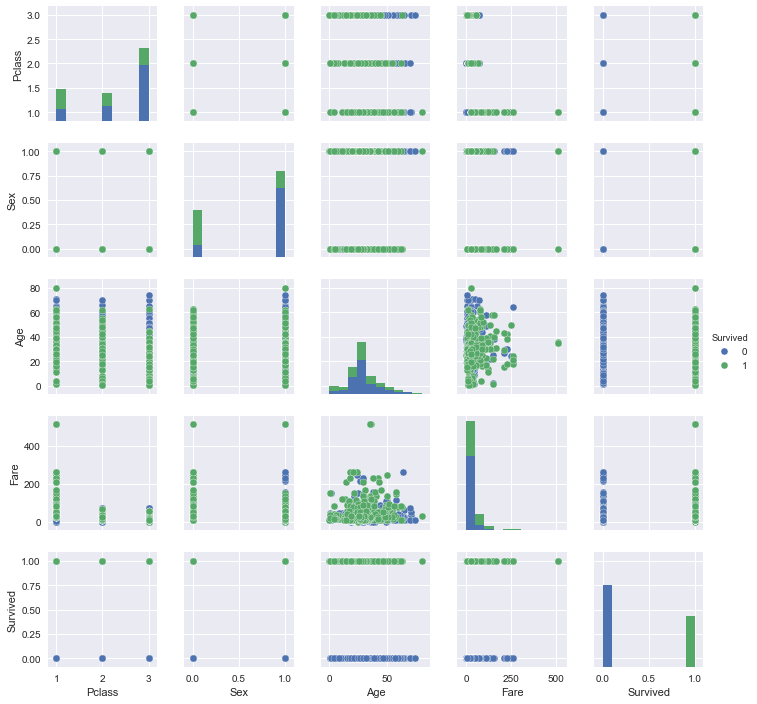

In [82]:
import seaborn as sns
sns.pairplot(data.loc[:,["Pclass","Sex","Age","Fare","Survived"]],hue="Survived",size=2.0)
plt.show()

In [81]:
data.loc[:,["Pclass","Sex","Age","Fare"]]

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,0,27.000000,11.1333
9,2,0,14.000000,30.0708


In [83]:
# パーセプトロンを用いて学習を行う
from sklearn.linear_model import Perceptron
ppn_1 = Perceptron(eta0=0.1) # 学習率 0.1
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [87]:
ppn_1.score(X_1_test,y_1_test)

ValueError: X has 4 features per sample; expecting 3

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(random_state=0, n_estimators=20,max_depth=5)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [97]:
rfc_1.score(X_1_test,y_1_test)

0.82462686567164178

In [98]:
rfc_1.score(X_1_train,y_1_train)

0.8362760834670947

In [101]:
param_grid={"n_estimators":[1,10,25,50,75,100],
           "max_depth":[3,4,5,6,7,8,9]}

In [103]:
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [106]:
from sklearn.model_selection import GridSearchCV
gs_random=GridSearchCV(rfc_1,param_grid,cv=kf_5)

In [107]:
gs_random.fit(X_1_train,y_1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10, 25, 50, 75, 100], 'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [108]:
gs_random.best_params_

{'max_depth': 4, 'n_estimators': 25}

In [109]:
gs_random.score(X_1_train,y_1_train)

0.8362760834670947

In [110]:
gs_random.score(X_1_test,y_1_test)

0.82462686567164178

In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_1_train,y_1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
lr.score(X_1_train,y_1_train)

0.7929373996789727

In [113]:
lr.score(X_1_test,y_1_test)

0.78358208955223885

In [114]:
lr.predict_proba(X_1_test[1].reshape(1,-1))

array([[ 0.88593201,  0.11406799]])

In [173]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf",gamma=0.25,C=7)
svc.fit(X_1_train,y_1_train)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
svc.score(X_1_train,y_1_train)

0.9341894060995185

In [175]:
svc.score(X_1_test,y_1_test)

0.72014925373134331

In [132]:
param_grid2={"gamma":[0.2,0.25,0.3,0.4,0.5],
            "C":[2.5,3,4,5,6]}

In [133]:
gs_rbf=GridSearchCV(svc,param_grid2,cv=kf_5)

In [134]:
gs_rbf.fit(X_1_train,y_1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.2, 0.25, 0.3, 0.4, 0.5], 'C': [2.5, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [135]:
gs_rbf.best_params_

{'C': 4, 'gamma': 0.2}

In [138]:
gs_rbf.score(X_1_test,y_1_test)

0.72014925373134331

In [139]:
gs_rbf.score(X_1_train,y_1_train)

0.9229534510433387